In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

# Exercises
Use the `iris` database to answer the following quesitons:

In [3]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [4]:
df_iris = data('iris')

In [5]:
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### 1.
What does the distribution of petal lengths look like?

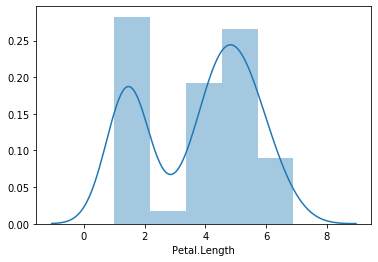

In [6]:
sns.distplot(df_iris['Petal.Length']);

### 2.
Is there a correlation between petal length and petal width?

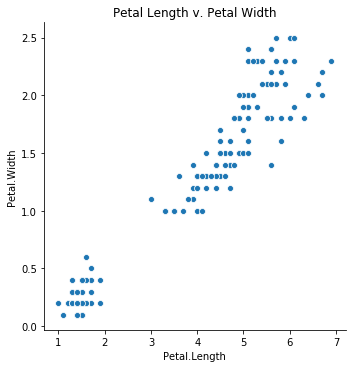

In [7]:
sns.relplot(x='Petal.Length', y='Petal.Width', data=df_iris)
plt.title("Petal Length v. Petal Width");

In [8]:
correl = df_iris["Petal.Length"].corr(df_iris["Petal.Width"])

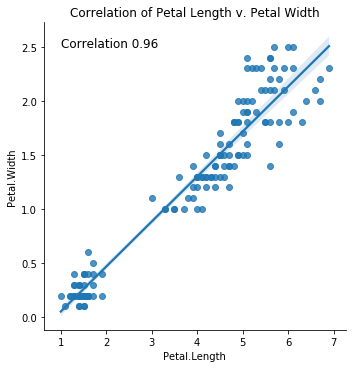

In [9]:
sns.lmplot(x='Petal.Length', y='Petal.Width', data=df_iris)

plt.title("Correlation of Petal Length v. Petal Width")
plt.text(1, 2.5, f"Correlation {round(correl, 2)}", fontsize='large');

### 3.
Would it be reasonable to predict species based on sepal width and sepal length?

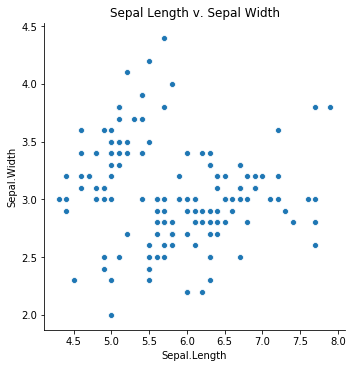

In [10]:
sns.relplot(x='Sepal.Length', y='Sepal.Width', data=df_iris)
plt.title("Sepal Length v. Sepal Width");

In [11]:
correl_2 = df_iris['Sepal.Length'].corr(df_iris['Sepal.Width'])

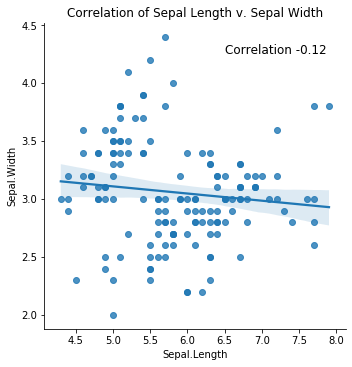

In [12]:
sns.lmplot(x='Sepal.Length', y='Sepal.Width', data=df_iris)

plt.title("Correlation of Sepal Length v. Sepal Width")
plt.text(6.5, 4.25, f"Correlation {round(correl_2, 2)}", fontsize='large');

Is would not be reasonable to predict species using sepal measurements because no distinguishable relationship exists.

### 4.
Which features would be best used to predict species?

__Petal measurements are a better species predictor than Sepal measurements__.

# 1.
Using the lesson as an example, use __`seaborn's`__ `load_dataset` function to load the `anscombe` data set.

In [13]:
df_anscombe = sns.load_dataset('anscombe')

> Analyze the data we're working with.

In [14]:
df_anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [15]:
df_anscombe.sample(5)

,dataset,x,y
20,II,7.0,7.26
36,IV,8.0,8.84
10,I,5.0,5.68
6,I,6.0,7.24
22,III,10.0,7.46


In [16]:
# Find the number of distinct/unique datasets
df_anscombe.dataset.nunique()

4

> Use __`pandas`__ to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [17]:
df_anscombe.groupby(by='dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

## Plot the x and y values from the `anscombe` data. Each dataset should be in a separate column.

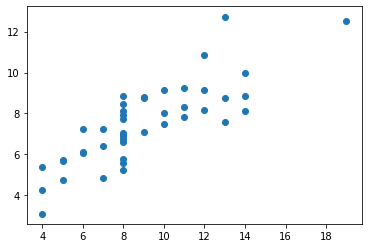

In [18]:
plt.scatter(x=df_anscombe.x, y=df_anscombe.y);

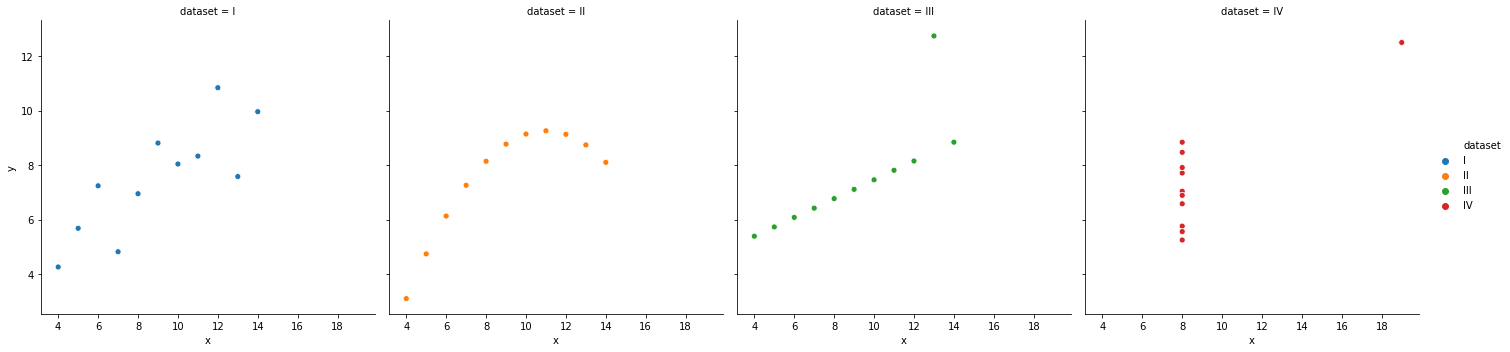

In [19]:
sns.relplot(x='x',
            y='y',
            hue='dataset',
            col='dataset',
            data=df_anscombe
           );

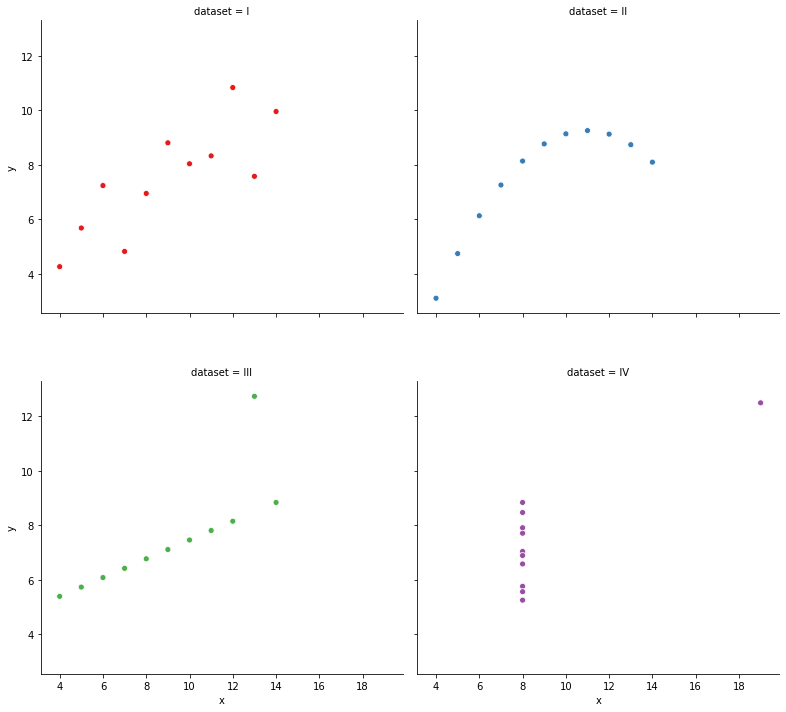

In [20]:
sns.relplot(x='x',
            y='y',
            hue='dataset',
            col='dataset',
            col_wrap=2,
            palette='Set1',
            data=df_anscombe)._legend.remove()

plt.tight_layout(h_pad=5);

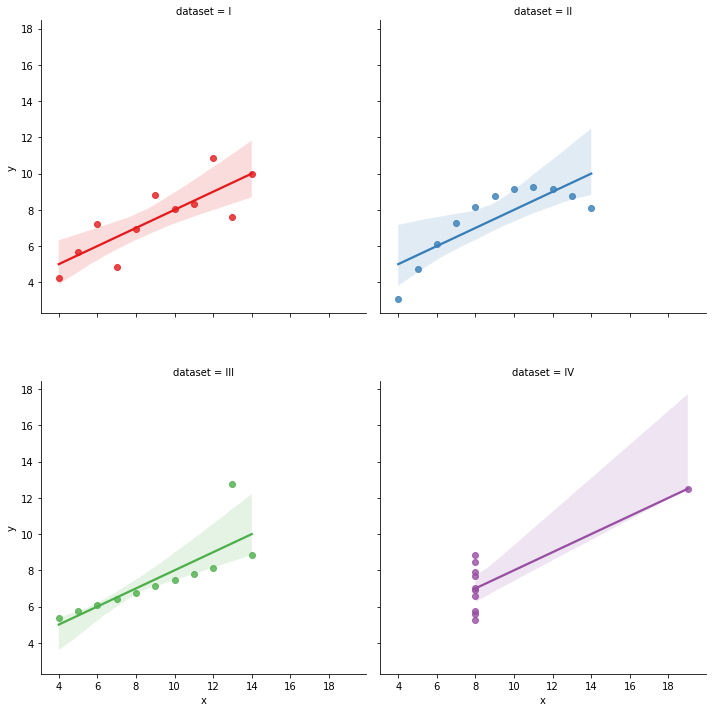

In [21]:
sns.lmplot(x='x',
            y='y',
            hue='dataset',
            col='dataset',
            col_wrap=2,
            palette='Set1',
#             order = 2,
            data=df_anscombe)

plt.tight_layout(h_pad=5);

In [22]:
df_I = df_anscombe[df_anscombe.dataset == 'I']
df_II = df_anscombe[df_anscombe.dataset == 'II']
df_III = df_anscombe[df_anscombe.dataset == 'III']
df_IV = df_anscombe[df_anscombe.dataset == 'IV']

print(df_I.x.corr(df_I.y))
print(df_II.x.corr(df_II.y)) # nonlinear relationship
print(df_III.x.corr(df_III.y)) 
print(df_IV.x.corr(df_IV.y))

0.81642051634484
0.8162365060002428
0.8162867394895984
0.8165214368885028


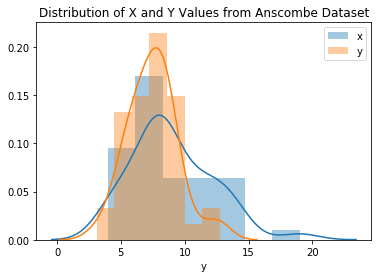

In [23]:
sns.distplot(df_anscombe.x, label='x')
sns.distplot(df_anscombe.y, label='y')
plt.legend()
plt.title("Distribution of X and Y Values from Anscombe Dataset");

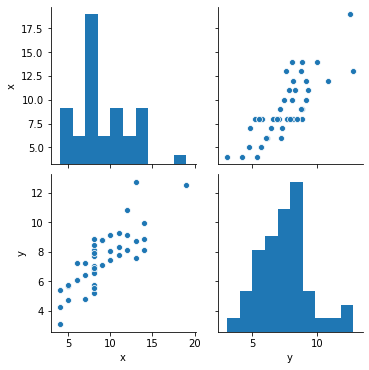

In [24]:
sns.pairplot(df_anscombe);

# 2.
Load the `InsectSprays` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [91]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [90]:
df_ins_spray = data('InsectSprays')

In [93]:
df_ins_spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


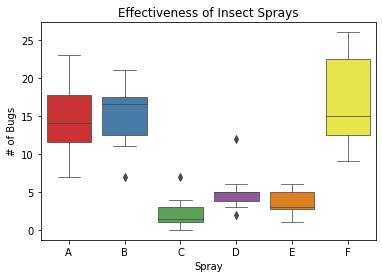

In [119]:
sns.boxplot(x='spray', y='count', data=df_ins_spray, palette="Set1",
           linewidth=.75, fliersize=5, whis=.997)

plt.title('Effectiveness of Insect Sprays')
plt.xlabel('Spray')
plt.ylabel('# of Bugs');

# 3.
Load the `swiss` dataset and read it's documentation. Create visualizations to answer the following questions:

In [120]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [26]:
df_swiss = data('swiss')

In [27]:
df_swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [28]:
df_swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


> Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

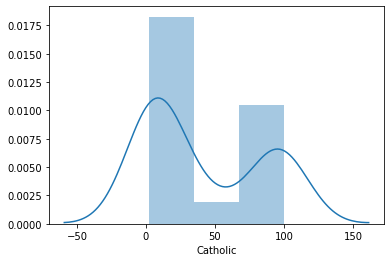

In [29]:
# Learned to make a cutoff point using distributions from Adam!
sns.distplot(df_swiss.Catholic);

In [30]:
df_swiss['is_catholic'] = df_swiss['Catholic'] >= 50

In [31]:
df_swiss['is_catholic'] = np.where(df_swiss['is_catholic'] == True, 'Yes', 'No')

> Does whether or not a province is Catholic influence fertility?

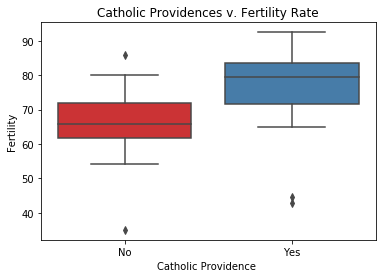

In [32]:
sns.boxplot(x='is_catholic', y='Fertility', data=df_swiss, palette="Set1", whis=.997)

plt.title('Catholic Providences v. Fertility Rate')
plt.xlabel('Catholic Providence ');

> What measure correlates most strongly with fertility?

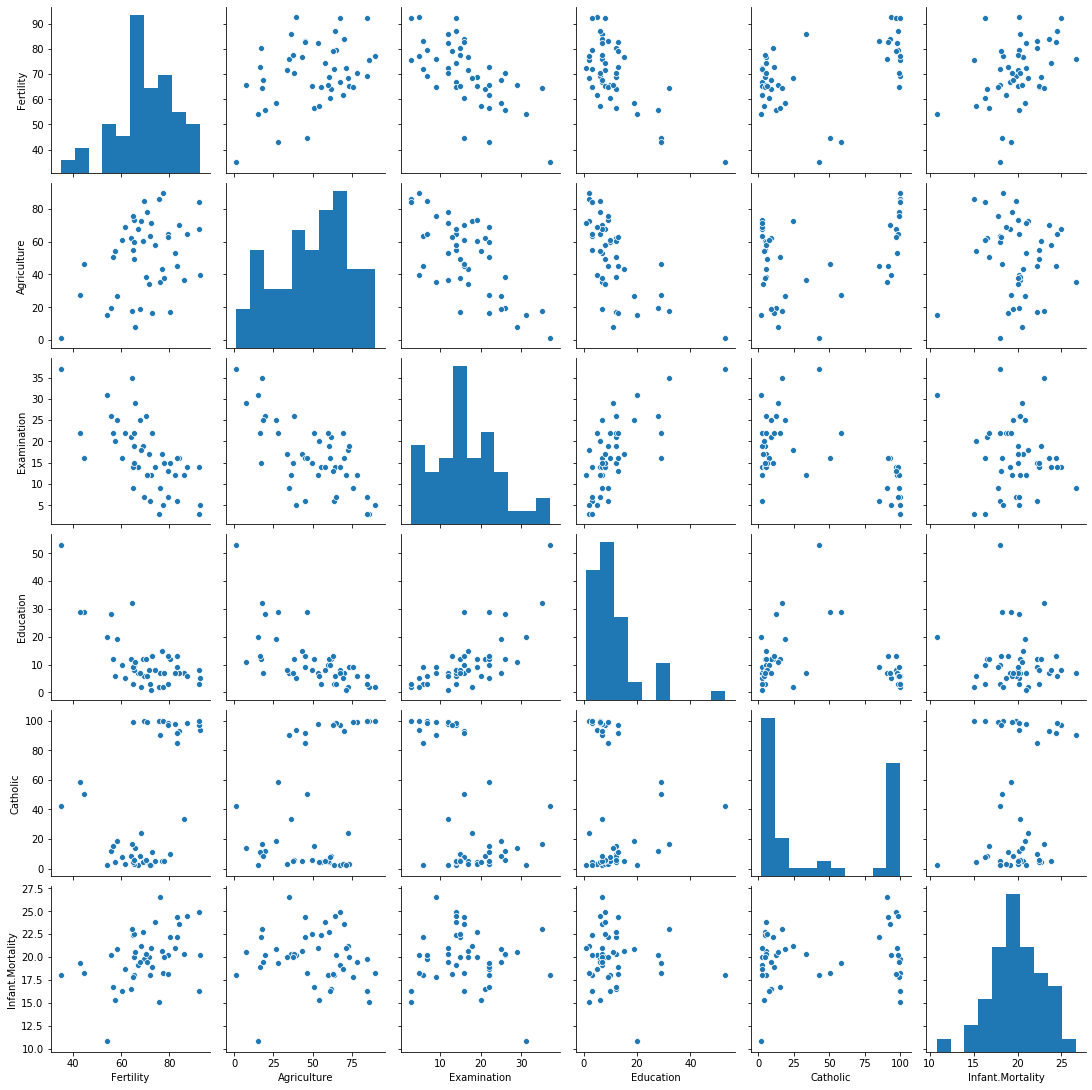

In [33]:
sns.pairplot(df_swiss);

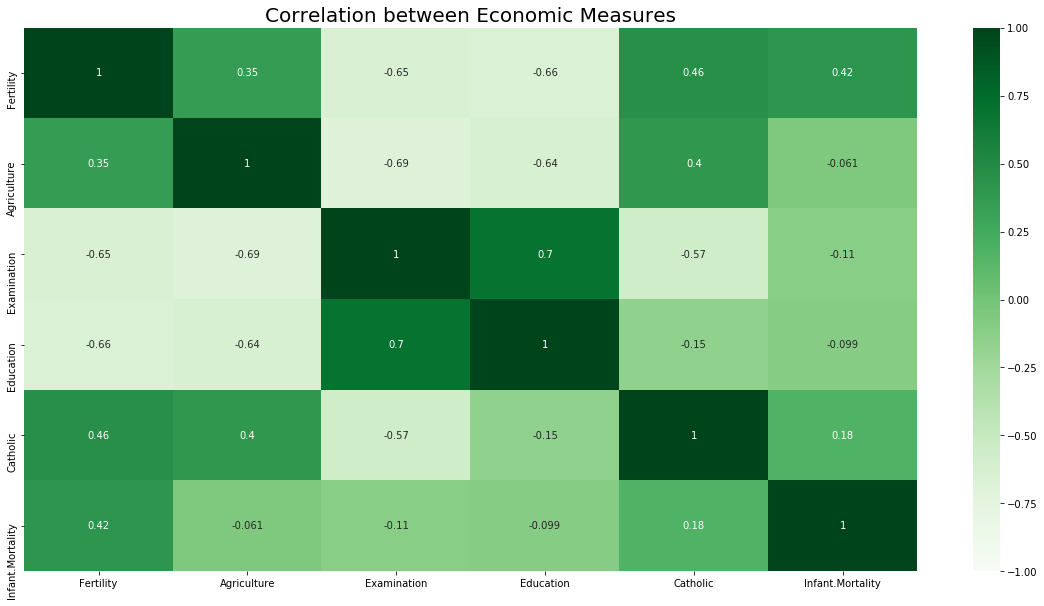

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df_swiss.corr(), annot=True, vmin=-1, vmax=1, cmap='Greens')
# sns.heatmap(df_swiss.corr(), annot=True, robust=True, cmap='Greens')

plt.title('Correlation between Economic Measures', size=20)
plt.tick_params(labelsize=10);

`Catholic` has the strongest correlation with `Fertility`.

# 4.
Using the `chipotle` dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [37]:
df_chipotle = pd.read_csv('chipotle.csv', index_col=0)
df_chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [38]:
df_chipotle.item_price = df_chipotle.item_price.str.replace('$', '').astype('float')

In [39]:
popular_items = df_chipotle.groupby(by='item_name').count()
top_4_popular_items = popular_items.sort_values(by='quantity', ascending=False).head(4)

In [45]:
popular_items = df_chipotle.groupby(by=['item_name']).quantity.agg(
    sum).sort_values(ascending=False)
popular_items

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [42]:
popular_4_id = popular_items.index[0:4]

In [49]:
revenue = df_chipotle.groupby(by="item_name").agg(sum).apply(popular_items.index[0:4])
revenue.item_price

Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

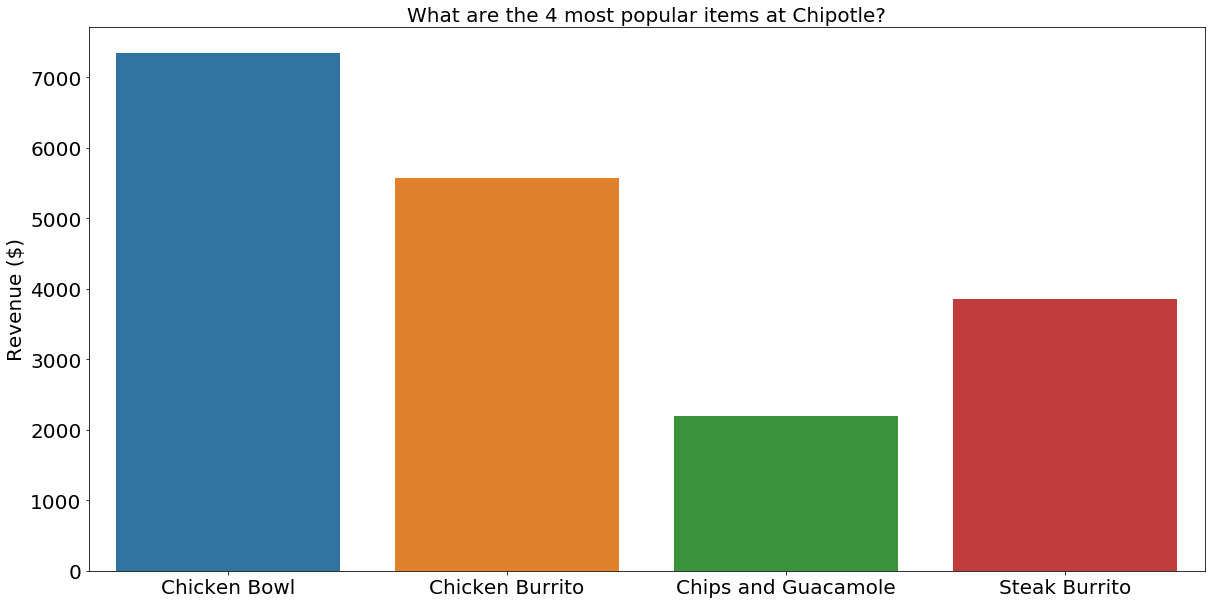

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x=revenue.item_price.index, y='item_price', data=revenue)

plt.title('What are the 4 most popular items at Chipotle?', size=20)
plt.xlabel(None)
plt.ylabel('Revenue ($)', size=20)
plt.tick_params(labelsize=20);

In [51]:
# plt.figure(figsize=(20,10))
# sns.barplot(x=top_four_items.index, y=top_four_items, palette='plasma')

# plt.title('What are the 4 most popular items at Chipotle?', size=20)
# plt.xlabel(None)
# plt.ylabel('Revenue ($)')
# plt.tick_params(labelsize=20)

# plt.text(3.25, 7250, 'Tacobell anyone?', size='small', horizontalalignment='center',
#          fontweight='semibold');

In [313]:
# plt.savefig('chipotle_top_4_items.svg.')

# 5.
Load the `sleepstudy` data and read it's documentation. 
> Use `seaborn` to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [359]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [56]:
df_sleep = data('sleepstudy')

In [57]:
df_sstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


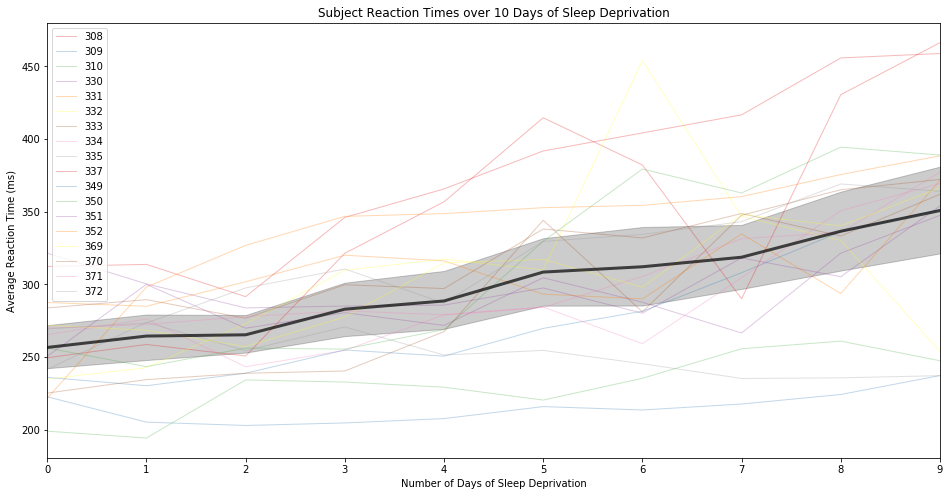

In [115]:
plt.figure(figsize=(16,8))

sns.lineplot(x='Days', y='Reaction', hue='Subject',
             data=df_sleep, linewidth=1, palette='Set1', alpha=.3)

sns.lineplot(x='Days', y='Reaction',
             data=df_sleep, linewidth=3, color='black', alpha=.7)

plt.legend(df_sleep.Subject.unique(), loc='upper left')
plt.legend.loc='upper left'
plt.title("Subject Reaction Times over 10 Days of Sleep Deprivation")
plt.xlim(0, 9)
plt.xlabel("Number of Days of Sleep Deprivation")
plt.ylabel("Average Reaction Time (ms)");